In [1]:
# Imports
# Python class
from knn import KNN

# sklearn model
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Preprocessing/ Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans # determine optimal k
from sklearn.metrics import accuracy_score

### Load Data

In [2]:
iris = load_iris()

### Exploration

In [3]:
# Checking the dataset
iris.data
print(iris.data.shape)

(150, 4)


In [4]:
# Checking features
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# Separate into target from features
#Scale features
X = scale(iris.data)

In [6]:
X.shape

(150, 4)

In [7]:
y = iris.target # classes

### Choosing optimal k (nearest neighbors)

In [8]:
sum_of_squared_distances = []
K = range(1,18)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

The "elbow" for this graph looks to be around 3.

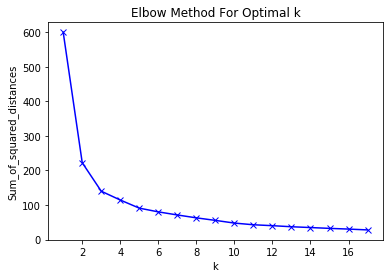

In [9]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [10]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) # for reproducible results

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

### Sklearn - KNN Classifier

In [12]:
#1. Choose K based on results from elbow method
clf = KNeighborsClassifier(n_neighbors=3)

In [13]:
#2.  Fit
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [14]:
#3. Prediction
predict = clf.predict(X_test)
print("******SKLEARN******")
print(f'Prediction:\n {predict}')

******SKLEARN******
Prediction:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [15]:
#4. Accuracy Score
print(f"Scikit-learn KNN classifier accuracy: {accuracy_score(y_test, predict)}")

Scikit-learn KNN classifier accuracy: 1.0


In [16]:
#5.  y_pred
y_pred = clf.predict([X_test[0]])
print("y_pred", y_pred)

y_pred [1]


### KNN from Scratch in Python 

In [17]:
#1. Instantiate model
np_clf = KNN(k=3)

In [18]:
#2. Fit
np_clf.fit(X_train, y_train)

In [19]:
#3. Prediction
predict = np_clf.predict(X_test)
print("******PYTHON MODEL******")
print("Prediction", predict)

******PYTHON MODEL******
Prediction [1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0]


In [20]:
#4. Accuracy Score
print(f"KNN model accuracy: {accuracy_score(y_test, predict)}")

KNN model accuracy: 1.0
